In [18]:
 from google.colab import drive

 drive.mount('/content/gdrive')
import pandas as pd

import zipfile
import os

# Path to the ZIP file in your Google Drive
matches = '/content/gdrive/My Drive/path/to/extract/results.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(matches)

# Convert 'date' column to datetime format (if not already)
df['date'] = pd.to_datetime(df['date'])

# Filter matches from 2020 to 2024
df_filtered = df[(df['date'] >= '2000-01-01') & (df['date'] <= '2024-06-16')]

# List of countries participating in Euros during 2020-2024 (example)
euro_participants = [ 'Austria', 'Belgium', 'Croatia', 'Czech Republic', 'Denmark', 'England', 'Slovakia', 'France',
    'Germany', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland',
    'Spain', 'Albania', 'Switzerland', 'Turkey', 'Ukraine', 'Georgia', 'Slovenia', 'Serbia']  # Add more countries as needed


# Filter matches where either home team or away team is in euro_participants
df_filtered = df_filtered[df_filtered['home_team'].isin(euro_participants) & df_filtered['away_team'].isin(euro_participants)]


# If home team won = 1 if not = 0
df_filtered["home_win"] = (df_filtered["home_score"] > df_filtered["away_score"]).astype("int")

# If they are the home team
df_filtered["venue_code"] = (df_filtered["country"] == df_filtered["home_team"]).astype("category").cat.codes
df_filtered["away_team_code"] =  df_filtered["away_team"].astype("category").cat.codes
df_filtered["cityin"] = df_filtered["city"].astype("category").cat.codes
df_filtered["tournament_code"] = df_filtered["tournament"].astype("category").cat.codes


#df_filtered['tournament_code'] = df_filtered['tournament'].apply(lambda x: 0 if x.lower() == 'friendly' else 1)


# Handle missing values if any
df_filtered.ffill(inplace=True)


# Create a helper function to calculate recent performance
def calculate_recent_performance(group, window=5):
    return group['home_win'].rolling(window=window, min_periods=1).mean()

# Apply the function to home and away teams
df_filtered['home_team_recent_performance'] = df_filtered.groupby('home_team', group_keys=False).apply(calculate_recent_performance)
df_filtered['away_team_recent_performance'] = df_filtered.groupby('away_team', group_keys=False).apply(calculate_recent_performance)

# Fill any remaining NaN values that may exist at the start of the rolling window
df_filtered['home_team_recent_performance'].fillna(0, inplace=True)
df_filtered['away_team_recent_performance'].fillna(0, inplace=True)

# Display the first few rows of the DataFrame
print(df_filtered.head())

# Example: Saving the filtered dataset to a new CSV file
filtered_csv_path = '/content/gdrive/My Drive/path/to/extract/filtered_data.csv'
df_filtered.to_csv(filtered_csv_path, index=False)

print("Filtered dataset saved successfully.")

# Display the first few rows of the DataFrame
print(df_filtered.head())
df_filtered.dtypes

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
            date home_team away_team  home_score  away_score  \
24055 2000-01-26     Spain    Poland         3.0         0.0   
24094 2000-02-04   Romania   Georgia         1.0         1.0   
24173 2000-02-23   Belgium  Portugal         1.0         1.0   
24175 2000-02-23   Croatia     Spain         0.0         0.0   
24178 2000-02-23    France    Poland         1.0         0.0   

                            tournament         city  country  neutral  \
24055                         Friendly    Cartagena    Spain    False   
24094  Cyprus International Tournament      Larnaca   Cyprus     True   
24173                         Friendly    Charleroi  Belgium    False   
24175                         Friendly        Split  Croatia    False   
24178                         Friendly  Saint-Denis   France    False   

       home_win  venue_code  away_team_code  

,0
date,datetime64[ns]
home_team,object
away_team,object
home_score,float64
away_score,float64
tournament,object
city,object
country,object
neutral,bool
home_win,int64


In [3]:
import pandas as pd
import zipfile
import os

# Path to the ZIP file containing FIFA rankings data
rankings = '/content/gdrive/My Drive/path/to/extract/fifa_ranking-2024-04-04.csv'

# Load the FIFA rankings data into a DataFrame
fifa_rankings_df = pd.read_csv(rankings)

# Convert 'rank_date' column to datetime format
fifa_rankings_df['rank_date'] = pd.to_datetime(fifa_rankings_df['rank_date'])

# Define Euro participants
euro_participants = [ 'Austria', 'Belgium', 'Croatia', 'Czechia', 'Denmark', 'England', 'Slovakia', 'France',
    'Germany', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland',
    'Spain', 'Albania', 'Switzerland', 'Turkey', 'Ukraine', 'Georgia', 'Slovenia', 'Serbia']

# Filter FIFA rankings data to include only Euro participants and dates from 2020 to 2024
filtered_fifa_rankings = fifa_rankings_df[(fifa_rankings_df['country_full'].isin(euro_participants)) &
                                          (fifa_rankings_df['rank_date'].dt.year >= 2020) &
                                          (fifa_rankings_df['rank_date'].dt.year <= 2024)]

# Path to save the filtered FIFA rankings dataset to a new CSV file
filtered_rankings_csv_path = '/content/gdrive/My Drive/path/to/extract/filtered_fifa_rankings1.csv'

# Save the filtered FIFA rankings dataset to a new CSV file
filtered_fifa_rankings.to_csv(filtered_rankings_csv_path, index=False)

print(f"Filtered FIFA rankings dataset saved to: {filtered_rankings_csv_path}")

# Optionally, print the first few rows of the filtered FIFA rankings dataset for verification
print("\nFirst few rows of filtered FIFA rankings dataset:")

print(filtered_fifa_rankings.head())

print(filtered_fifa_rankings.dtypes)


Filtered FIFA rankings dataset saved to: /content/gdrive/My Drive/path/to/extract/filtered_fifa_rankings1.csv

First few rows of filtered FIFA rankings dataset:
       rank country_full country_abrv  total_points  previous_points  \
60755  64.0     Slovenia          SVN        1365.0           1365.0   
60766  66.0      Albania          ALB        1356.0           1356.0   
60782  91.0      Georgia          GEO        1267.0           1267.0   
60800  19.0       Poland          POL        1559.0           1559.0   
60803  16.0      Denmark          DEN        1598.0           1598.0   

       rank_change confederation  rank_date  
60755            0          UEFA 2020-02-20  
60766            0          UEFA 2020-02-20  
60782            0          UEFA 2020-02-20  
60800            0          UEFA 2020-02-20  
60803            0          UEFA 2020-02-20  
rank                      float64
country_full               object
country_abrv               object
total_points              fl

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

train = df_filtered[df_filtered["date"] <= '2019-11-01']
test = df_filtered[df_filtered["date"] > '2019-11-01']

predictors = ["venue_code", "away_team_code", "cityin", "tournament_code", "home_team_recent_performance", "away_team_recent_performance"   ]

#predictors = ["venue_code", "away_team_code", "home_team_recent_performance", "away_team_recent_performance"]

rf.fit(train[predictors], train["home_win"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

preds = rf.predict(test[predictors])

from sklearn.metrics import accuracy_score

acc = accuracy_score(test["home_win"], preds)
acc

0.8

In [5]:
combined = pd.DataFrame(dict(actual=test["home_win"], prediction = preds))
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,133,33
1,25,99


In [6]:
from sklearn.metrics import precision_score

precision_score(test["home_win"], preds)

grouped_matches = df_filtered.groupby("home_team")
group = grouped_matches.get_group("Germany")
group

def rolling_averages(group, cols, new_cols):
  group = group.sort_values("date")
  rolling_stats = group[cols].rolling(3, closed='left').mean()
  group[new_cols] = rolling_stats
  group = group.dropna(subset=new_cols)
  return group

cols = ["home_win"]
new_cols = [f"{c}_rolling" for c in cols]
new_cols

rolling_averages(group, cols, new_cols)

matches_rolling = df_filtered.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

matches_rolling= matches_rolling.droplevel('home_team')
matches_rolling

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,venue_code,away_team_code,cityin,tournament_code,home_team_recent_performance,away_team_recent_performance,home_win_rolling
27494,2003-09-10,Albania,Georgia,3.0,1.0,UEFA Euro qualification,Tirana,Albania,False,1,1,8,215,9,0.25,0.8,0.000000
28596,2004-10-09,Albania,Denmark,0.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,0,1,5,215,3,0.20,0.4,0.333333
28928,2005-02-09,Albania,Ukraine,0.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,0,1,23,215,3,0.20,0.4,0.333333
29144,2005-06-04,Albania,Georgia,3.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,1,1,8,215,3,0.40,0.8,0.333333
29525,2005-10-12,Albania,Turkey,0.0,1.0,FIFA World Cup qualification,Tirana,Albania,False,0,1,22,215,3,0.40,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44123,2021-07-03,Ukraine,England,0.0,4.0,UEFA Euro,Rome,Italy,True,0,0,6,191,8,0.40,0.4,0.333333
44275,2021-09-04,Ukraine,France,1.0,1.0,FIFA World Cup qualification,Kyiv,Ukraine,False,0,1,7,109,3,0.20,0.0,0.333333
45522,2022-09-27,Ukraine,Scotland,0.0,0.0,UEFA Nations League,Kraków,Poland,True,0,0,16,107,10,0.20,0.2,0.000000
46302,2023-09-09,Ukraine,England,1.0,1.0,UEFA Euro qualification,Wrocław,Poland,True,0,0,6,235,9,0.00,0.4,0.000000


In [7]:
matches_rolling.index = range(matches_rolling.shape[0])

In [8]:
matches_rolling

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,venue_code,away_team_code,cityin,tournament_code,home_team_recent_performance,away_team_recent_performance,home_win_rolling
0,2003-09-10,Albania,Georgia,3.0,1.0,UEFA Euro qualification,Tirana,Albania,False,1,1,8,215,9,0.25,0.8,0.000000
1,2004-10-09,Albania,Denmark,0.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,0,1,5,215,3,0.20,0.4,0.333333
2,2005-02-09,Albania,Ukraine,0.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,0,1,23,215,3,0.20,0.4,0.333333
3,2005-06-04,Albania,Georgia,3.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,1,1,8,215,3,0.40,0.8,0.333333
4,2005-10-12,Albania,Turkey,0.0,1.0,FIFA World Cup qualification,Tirana,Albania,False,0,1,22,215,3,0.40,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,2021-07-03,Ukraine,England,0.0,4.0,UEFA Euro,Rome,Italy,True,0,0,6,191,8,0.40,0.4,0.333333
1356,2021-09-04,Ukraine,France,1.0,1.0,FIFA World Cup qualification,Kyiv,Ukraine,False,0,1,7,109,3,0.20,0.0,0.333333
1357,2022-09-27,Ukraine,Scotland,0.0,0.0,UEFA Nations League,Kraków,Poland,True,0,0,16,107,10,0.20,0.2,0.000000
1358,2023-09-09,Ukraine,England,1.0,1.0,UEFA Euro qualification,Wrocław,Poland,True,0,0,6,235,9,0.00,0.4,0.000000


In [9]:
def make_predictions(data,predictors):



  train = data[data["date"] < '2024-01-01']
  test = data[data["date"] > '2024-01-01']


  rf.fit(train[predictors], train["home_win"])
  preds = rf.predict(test[predictors])
  combined = pd.DataFrame(dict(actual=test["home_win"], prediction=preds, index=test.index))
  precision = precision_score(test["home_win"], preds)
  return combined, precision


In [10]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [11]:
precision

0.8333333333333334

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Path to the CSV file in your Google Drive
matches = '/content/gdrive/My Drive/path/to/extract/results.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(matches)

# Convert 'date' column to datetime format (if not already)
df['date'] = pd.to_datetime(df['date'])

# Filter matches from 2020 to 2024
df_filtered = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2024-06-16')]

# List of countries participating in Euros during 2020-2024 (example)
euro_participants = ['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'Denmark', 'England', 'Slovakia', 'France',
    'Germany', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland',
    'Spain', 'Albania', 'Switzerland', 'Turkey', 'Ukraine', 'Georgia', 'Slovenia', 'Serbia']

# Filter matches where either home team or away team is in euro_participants
df_filtered = df_filtered[df_filtered['home_team'].isin(euro_participants) & df_filtered['away_team'].isin(euro_participants)]

# If home team won = 1 if not = 0
df_filtered["home_win"] = (df_filtered["home_score"] > df_filtered["away_score"]).astype("int")

# If they are the home team
df_filtered["venue_code"] = (df_filtered["country"] == df_filtered["home_team"]).astype("category").cat.codes
df_filtered["away_team_code"] =  df_filtered["away_team"].astype("category").cat.codes
df_filtered["cityin"] = df_filtered["city"].astype("category").cat.codes
df_filtered["tournament_code"] = df_filtered["tournament"].astype("category").cat.codes

# Handle missing values if any
df_filtered.ffill(inplace=True)

# Create a helper function to calculate recent performance
def calculate_recent_performance(group, window=5):
    return group['home_win'].rolling(window=window, min_periods=1).mean()

# Apply the function to home and away teams
df_filtered['home_team_recent_performance'] = df_filtered.groupby('home_team', group_keys=False).apply(calculate_recent_performance)
df_filtered['away_team_recent_performance'] = df_filtered.groupby('away_team', group_keys=False).apply(calculate_recent_performance)

# Fill any remaining NaN values that may exist at the start of the rolling window
df_filtered['home_team_recent_performance'].fillna(0, inplace=True)
df_filtered['away_team_recent_performance'].fillna(0, inplace=True)

# Display the first few rows of the DataFrame
print(df_filtered.head())


# Example: Saving the filtered dataset to a new CSV file
filtered_csv_path = '/content/gdrive/My Drive/path/to/extract/filtered_data.csv'
df_filtered.to_csv(filtered_csv_path, index=False)

print("Filtered dataset saved successfully.")

# Display the first few rows of the DataFrame
print(df_filtered.head())

# Select only numeric columns for correlation matrix
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_filtered[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Prepare training and testing data
train = df_filtered[df_filtered["date"] < '2023-01-01']
test = df_filtered[df_filtered["date"] >= '2023-01-01']
predictors = ["venue_code", "away_team_code", "cityin", "tournament_code", "home_team_recent_performance", "away_team_recent_performance"]

# Check for missing values in the training data
print(train[predictors].isnull().sum())
# Handle missing values in the training data
train[predictors] = train[predictors].fillna(train[predictors].mean())

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

# Fit the model
rf.fit(train[predictors], train["home_win"])

# Predictions
preds = rf.predict(test[predictors])

# Evaluation
acc = accuracy_score(test["home_win"], preds)
precision = precision_score(test["home_win"], preds)

print("Accuracy: ", acc)
print("Precision: ", precision)
print(classification_report(test["home_win"], preds))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Filtered dataset saved successfully.
            date    home_team       away_team  home_score  away_score  \
43295 2020-09-03      Germany           Spain         1.0         1.0   
43296 2020-09-03      Ukraine     Switzerland         2.0         1.0   
43298 2020-09-03       Turkey         Hungary         0.0         1.0   
43306 2020-09-04  Netherlands          Poland         1.0         0.0   
43310 2020-09-04     Slovakia  Czech Republic         1.0         3.0   

                tournament        city      country  neutral  home_win  \
43295  UEFA Nations League   Stuttgart      Germany    False         0   
43296  UEFA Nations League        Lviv      Ukraine    False         1   
43298  UEFA Nations League       Sivas       Turkey    False         0   
43306  UEFA Nations League   Amsterdam  Netherlands    False         1   
43310  UEFA Nations Lea

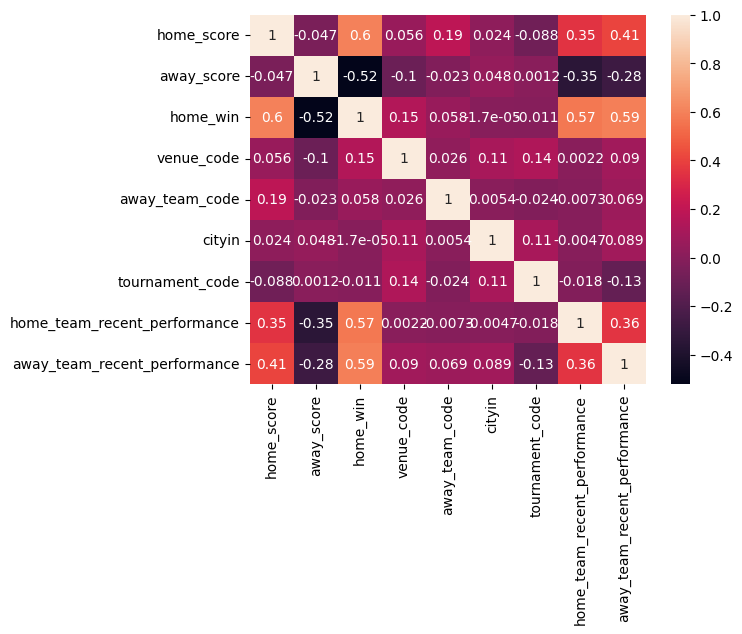

Accuracy:  0.8115942028985508
Precision:  0.75
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        36
           1       0.75      0.91      0.82        33

    accuracy                           0.81        69
   macro avg       0.82      0.82      0.81        69
weighted avg       0.83      0.81      0.81        69



In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Path to the CSV file in your Google Drive
matches = '/content/gdrive/My Drive/path/to/extract/results.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(matches)

# Convert 'date' column to datetime format (if not already)
df['date'] = pd.to_datetime(df['date'])

# Filter matches from 2020 to 2024
df_filtered = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2024-06-16')]

# List of countries participating in Euros during 2020-2024 (example)
euro_participants = ['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'Denmark', 'England', 'Slovakia', 'France',
    'Germany', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland',
    'Spain', 'Albania', 'Switzerland', 'Turkey', 'Ukraine', 'Georgia', 'Slovenia', 'Serbia']

# Filter matches where either home team or away team is in euro_participants
df_filtered = df_filtered[df_filtered['home_team'].isin(euro_participants) & df_filtered['away_team'].isin(euro_participants)]

# If home team won = 1 if not = 0
df_filtered["home_win"] = (df_filtered["home_score"] > df_filtered["away_score"]).astype("int")

# If they are the home team
df_filtered["venue_code"] = (df_filtered["country"] == df_filtered["home_team"]).astype("category").cat.codes
df_filtered["away_team_code"] =  df_filtered["away_team"].astype("category").cat.codes
df_filtered["cityin"] = df_filtered["city"].astype("category").cat.codes
df_filtered["tournament_code"] = df_filtered["tournament"].astype("category").cat.codes

# Handle missing values if any
df_filtered.ffill(inplace=True)

# Feature engineering: adding recent performance feature
def calculate_recent_performance(group, window=5):
    return group['home_win'].rolling(window=window, min_periods=1).mean()

df_filtered['home_team_recent_performance'] = df_filtered.groupby('home_team', group_keys=False).apply(calculate_recent_performance)
df_filtered['away_team_recent_performance'] = df_filtered.groupby('away_team', group_keys=False).apply(calculate_recent_performance)

# Fill any remaining NaN values that may exist at the start of the rolling window
df_filtered['home_team_recent_performance'].fillna(0, inplace=True)
df_filtered['away_team_recent_performance'].fillna(0, inplace=True)

# Example: Saving the filtered dataset to a new CSV file
filtered_csv_path = '/content/gdrive/My Drive/path/to/extract/filtered_data.csv'
df_filtered.to_csv(filtered_csv_path, index=False)

print("Filtered dataset saved successfully.")

# Display the first few rows of the DataFrame
print(df_filtered.head())

# Select only numeric columns for correlation matrix
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_filtered[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Prepare training and testing data
train = df_filtered[df_filtered["date"] < '2023-01-01']
test = df_filtered[df_filtered["date"] >= '2023-01-01']
#predictors = ["venue_code", "away_team_code", "cityin", "tournament_code", "home_team_recent_performance", "away_team_recent_performance"]
predictors = ["venue_code", "away_team_code", "home_team_recent_performance", "away_team_recent_performance"]
# Handle missing values in the predictors
train.loc[:, predictors] = train[predictors].fillna(train[predictors].mean())
test.loc[:, predictors] = test[predictors].fillna(train[predictors].mean())

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

# Fit the model
rf.fit(train[predictors], train["home_win"])

# Predictions
preds = rf.predict(test[predictors])

# Evaluation
acc = accuracy_score(test["home_win"], preds)
precision = precision_score(test["home_win"], preds)

print("Accuracy: ", acc)
print("Precision: ", precision)
print(classification_report(test["home_win"], preds))
